# Neural Networks

In this notebook we are going to explore the Neural Networks for image classification. We are going to use the same dataset of the SVM notebook: Fashion MNIST (https://pravarmahajan.github.io/fashion/), a dataset of small images of clothes and accessories.

The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [2]:
# helper function to load Fashion MNIST dataset from disk
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

# TODO 
Place your ID ("numero di matricola") that will be used as seed for random generator. You can try to change the seed to see the impact of the randomization.

In [3]:
ID = 1206077
np.random.seed(ID)

In [4]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
X, y = load_mnist("data")
# rescale the data
X = X / 255.0

Now split into training and test. Make sure that each label is present at least 10 times
in training frequencies.

In [5]:
#random permute the data and split into training and test taking the first 500
#data samples as training and the rests as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 500

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [57 47 52 53 42 42 65 45 45 52]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


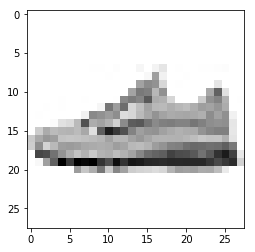

LABEL: 7
INPUT:


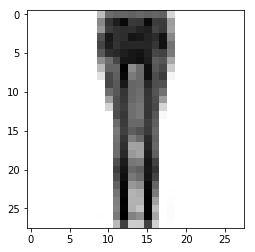

LABEL: 1
INPUT:


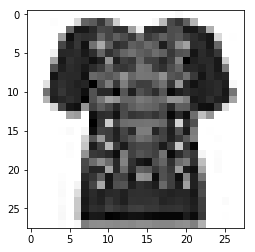

LABEL: 6


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,100)
plot_input(X_test,y_test,10000)

## TO DO 1

Now use a Feed-forward Neural Network for prediction. Use the multi-layer perceptron classifier, with the following parameters: max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization term.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 100. Evaluate the architectures you chose using the GridSearchCV with cv=5.


In [8]:
parameters = {'hidden_layer_sizes': [(10,), (50,),(100,), (10,10,), (50,50,), (100,100,),(10,10,10),(50,50,50),(100,100,100)]}

mlp = MLPClassifier(max_iter=300, alpha=1e-4,
                    solver='sgd', tol=1e-4, random_state=ID,
                    learning_rate_init=.1)

#ADD YOUR CODE

classificatore = GridSearchCV(mlp,parameters, cv=5, return_train_score=True)
classificatore.fit(X_train, y_train)

print ('RESULTS FOR NN\n')

print("Best parameters set found:")
#ADD YOUR CODE
best_p=classificatore.best_params_
print(best_p)

print("Score with best parameters:")
#ADD YOUR CODE
score=classificatore.best_score_
print(score)

print("\nAll scores on the grid:")
#ADD YOUR CODE
risultati=pd.DataFrame(classificatore.cv_results_ )
risultati[['mean_test_score','params']]

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RESULTS FOR NN

Best parameters set found:
{'hidden_layer_sizes': (100,)}
Score with best parameters:
0.666

All scores on the grid:


,mean_test_score,params
0,0.440,"{'hidden_layer_sizes': (10,)}"
1,0.530,"{'hidden_layer_sizes': (50,)}"
2,0.666,"{'hidden_layer_sizes': (100,)}"
3,0.336,"{'hidden_layer_sizes': (10, 10)}"
4,0.440,"{'hidden_layer_sizes': (50, 50)}"
5,0.546,"{'hidden_layer_sizes': (100, 100)}"
6,0.304,"{'hidden_layer_sizes': (10, 10, 10)}"
7,0.424,"{'hidden_layer_sizes': (50, 50, 50)}"
8,0.560,"{'hidden_layer_sizes': (100, 100, 100)}"


### QUESTION 1

What do you observe for different architectures and their scores? How the nummber of layers and their sizes affect the performances?

Come si può notare dalla tabella soprastante il miglior risultato si è ottenuto utilizzando un solo layer con dimensione 100. Osservando l'andamento generale si nota che aumentando il numero di layer si ha un cambiamento di accuratezza non troppo rilevante mentre mantenendo il numero di layer fisso e andando ad aumentare la dimensione si ha un sostanziale miglioramento dello score.


### TO DO 2

Now get training and test error for a NN with best parameters from above. Use verbose=True
in input so to see how loss changes in iterations

In [9]:
#get training and test error for the best NN model from CV

#ADD YOUR CODE
best_clf = MLPClassifier(hidden_layer_sizes=best_p['hidden_layer_sizes'], solver='sgd', alpha=1e-4, learning_rate_init=.1, 
                        max_iter=300,random_state=ID, tol=1e-4, verbose=True)


best_clf.fit(X_train, y_train)

training_error = 1. - best_clf.score(X_train,y_train) #ADD YOUR CODE
test_error = 1. - best_clf.score(X_test,y_test)

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

Iteration 1, loss = 2.20127349
Iteration 2, loss = 1.40804498
Iteration 3, loss = 1.26506532
Iteration 4, loss = 0.95941780
Iteration 5, loss = 0.76234571
Iteration 6, loss = 0.65866221
Iteration 7, loss = 0.56442832
Iteration 8, loss = 0.56065921
Iteration 9, loss = 0.61401649
Iteration 10, loss = 0.51500892
Iteration 11, loss = 0.43636524
Iteration 12, loss = 0.44147674
Iteration 13, loss = 0.39623214
Iteration 14, loss = 0.43079893
Iteration 15, loss = 0.32737097
Iteration 16, loss = 0.38036824
Iteration 17, loss = 0.28843408
Iteration 18, loss = 0.27037295
Iteration 19, loss = 0.23909737
Iteration 20, loss = 0.37435926
Iteration 21, loss = 0.28382902
Iteration 22, loss = 0.20659478
Iteration 23, loss = 0.19340521
Iteration 24, loss = 0.17885380
Iteration 25, loss = 0.21087991
Iteration 26, loss = 0.23770391
Iteration 27, loss = 0.18060325
Iteration 28, loss = 0.11880844
Iteration 29, loss = 0.11534764
Iteration 30, loss = 0.10577073
Iteration 31, loss = 0.09540153
Iteration 32, los

## More data 
Now let's do the same but using 10000 (or less if it takes too long on your machine) data points for training. Use the same NN architectures as before, but you can try more if you want!

In [10]:
X = X[permutation]
y = y[permutation]

m_training = 10000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

print("Labels and frequencies in training dataset: ")
np.unique(y_train, return_counts=True)

Labels and frequencies in training dataset: 


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 990,  993, 1011,  996, 1010,  973, 1040,  972, 1025,  990]))

## TO DO 3

Now train the NNs with the added data points. Feel free to try more different architectures than before if you want, or less if it takes too much time. We suggest that you use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).

In [11]:
#for NN we try the same architectures as before
parameters = {'hidden_layer_sizes': [(10,), (50,),(100,), (10,10,), (50,50,), (100,100,),(10,10,10),(50,50,50),(100,100,100)]}

#ADD YOUR CODE
mlp_large_CV = MLPClassifier(max_iter=300, alpha=1e-4,
                    solver='sgd', tol=1e-4, random_state=ID,
                    learning_rate_init=.1)


classificatore_large = GridSearchCV(estimator=mlp_large_CV, param_grid=parameters, cv=5, return_train_score=True)
classificatore_large.fit(X_train, y_train)

print ('\nRESULTS FOR NN\n')

print("Best parameters set found:")
print(classificatore_large.best_params_)

print("Score with best parameters:")
print(classificatore_large.best_score_)

print("\nAll scores on the grid:")
risultati_l=pd.DataFrame(classificatore_large.cv_results_ )
risultati_l[['mean_test_score','params']]

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



RESULTS FOR NN

Best parameters set found:
{'hidden_layer_sizes': (100, 100)}
Score with best parameters:
0.8146

All scores on the grid:


,mean_test_score,params
0,0.5841,"{'hidden_layer_sizes': (10,)}"
1,0.7875,"{'hidden_layer_sizes': (50,)}"
2,0.7991,"{'hidden_layer_sizes': (100,)}"
3,0.5023,"{'hidden_layer_sizes': (10, 10)}"
4,0.5462,"{'hidden_layer_sizes': (50, 50)}"
5,0.8146,"{'hidden_layer_sizes': (100, 100)}"
6,0.5471,"{'hidden_layer_sizes': (10, 10, 10)}"
7,0.6686,"{'hidden_layer_sizes': (50, 50, 50)}"
8,0.5468,"{'hidden_layer_sizes': (100, 100, 100)}"


## QUESTION 2
Describe your architecture choices and the results you observe with respect to the layers and sizes used.

Similmente a quanto osservato sopra si nota che all'aumentare della dimensione aumenta lo score mentre aumentando il numero di layer non vi è un particolare miglioramento di score. Si ha però che con 3 layer con dimensione 100 lo score è inferiore che con dimensione 50.

## TO DO 4

Get the train and test error for the best NN you obtained with 10000 points. This time you can run for 100 iterations. 


In [12]:
#get training and test error for the best NN model from CV

#ADD YOUR CODE
best_p_l=classificatore_large.best_params_
best_clf_large = MLPClassifier(hidden_layer_sizes=best_p_l['hidden_layer_sizes'], solver='sgd', alpha=1e-4, learning_rate_init=.1, 
                        max_iter=300,random_state=ID, tol=1e-4, verbose=True)


best_clf_large.fit(X_train, y_train)

training_error = 1. - best_clf_large.score(X_train,y_train) #ADD YOUR CODE
test_error = 1. - best_clf_large.score(X_test,y_test)

print ('RESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

Iteration 1, loss = 0.99931688
Iteration 2, loss = 0.50148408
Iteration 3, loss = 0.42326050
Iteration 4, loss = 0.39524524
Iteration 5, loss = 0.36920535
Iteration 6, loss = 0.34226691
Iteration 7, loss = 0.32630735
Iteration 8, loss = 0.30734840
Iteration 9, loss = 0.29930007
Iteration 10, loss = 0.26808123
Iteration 11, loss = 0.26770696
Iteration 12, loss = 0.25555399
Iteration 13, loss = 0.26221975
Iteration 14, loss = 0.23885261
Iteration 15, loss = 0.22625868
Iteration 16, loss = 0.21212526
Iteration 17, loss = 0.20655711
Iteration 18, loss = 0.18729053
Iteration 19, loss = 0.18434467
Iteration 20, loss = 0.17225403
Iteration 21, loss = 0.18984215
Iteration 22, loss = 0.17165045
Iteration 23, loss = 0.16472794
Iteration 24, loss = 0.15912139
Iteration 25, loss = 0.15223286
Iteration 26, loss = 0.15244475
Iteration 27, loss = 0.15298629
Iteration 28, loss = 0.16928276
Iteration 29, loss = 0.14141359
Iteration 30, loss = 0.13413277
Iteration 31, loss = 0.13138536
Iteration 32, los

## QUESTION 3

Compare the train and test error you got with a large number of samples with the best one you obtained with only 500 data points. Are the architectures the same or do they differ? What about the errors you get?

[ADD YOR ANSWER HERE]

per quanto riguarda l'errore sul test set esso è inferiore aumentando la dimensione del training e quindi si ha sicuramente una maggior accuratezza. L'architettura non viene mantenuta uguale a quella trovata in precendenza, con 500 dati infatti si otteneva il miglior risultato con un architettura : "(100)" mentre aumentando la dimensione del training si ha un architettura del tipo: "(100,100)". In realtà è possibile che il non mantenimento sia dovuto anche a una questione probabilistica legata al particolare seed scelto; osservando infatti gli score ottenuti con il training ampliato si ha che le due architetture (100) e (100,100) hanno uno score molto simile.

### TO DO 5

Plot a digit that was missclassified by NN with m=500 training data points and it is now instead correctly classified by NN with m=10000 training data points.

1 != 3
INPUT:


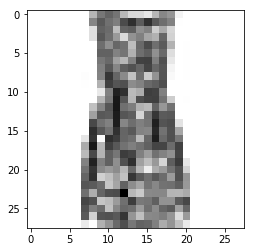

LABEL: 3


In [13]:
NN_prediction = best_clf.predict(X_test)
large_NN_prediction = best_clf_large.predict(X_test)
  
for i in range(len(y_test)):
    if (y_test[i]!=NN_prediction[i] ) and (y_test[i]==large_NN_prediction[i]):
        print(NN_prediction[i],'!=',large_NN_prediction[i])
        plot_input(X_test, y_test, i)
        break

Let's plot the weigths of the multi-layer perceptron classifier, for the best NN we get with 500 data points and with 50000 data points. Notice that the code assumes that the NNs are called "mlp" and "best_mlp_large" , you could need to replace with your variable names.



Weights with 500 data points:


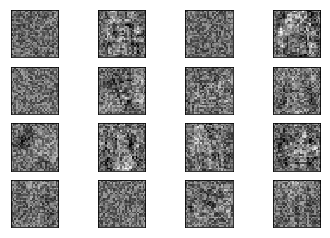

Weights with 10000 data points:


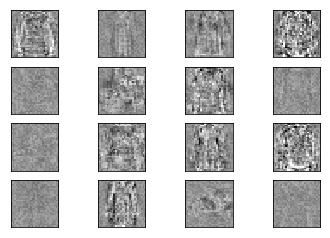

In [16]:
print("Weights with 500 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = best_clf.coefs_[0].min(), best_clf.coefs_[0].max()
for coef, ax in zip(best_clf.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 10000 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = best_clf_large.coefs_[0].min(), best_clf_large.coefs_[0].max()
for coef, ax in zip(best_clf_large.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## QUESTION 4

Describe what do you observe by looking at the weights

Osservando le immagini della categoria superiore si vede che sono meno nitide e non si riesce a distinguere quasi nulla, per il set più largo invece le immagini appaiono comunque rumorose ma si riesce per lo meno a distinguere le figure.

### TO DO 7

Report the best SVM model and its parameters, you found in the last notebook. Fit it on a few data points and compute its training and test scores.

In [18]:
m_training = 500

X_train, X_test = X[:m_training], X[m_training:2*m_training]
y_train, y_test = y[:m_training], y[m_training:2*m_training]

# best parameters found in the SVM notebook
# Create the SVM and perform the fit

#ADD YOUR CODE
SVM = SVC(C=100,gamma=0.01,kernel='rbf')
SVM.fit(X_train,y_train)

print ('RESULTS FOR SVM')

SVM_training_error =  1. - SVM.score(X_train,y_train)

print("Training score SVM:")
print(SVM_training_error)

SVM_test_error = 1. - SVM.score(X_test,y_test)
print("Test score SVM:")
print(SVM_test_error)

RESULTS FOR SVM
Training score SVM:
0.0
Test score SVM:
0.20799999999999996


## QUESTION 5
Compare the results of SVM and of NN. Which one would you preferer? Which are its tradeoffs?

Si è modificata la dimensione del set a 500 in modo da poter fare un confronto alla pari tra NN e SVM, i due metodi portano a un errore sul test praticamente uguale, l' unica differenza che si viene a creare è che mentre il SVM è praticamente istantaneo nel computare l'errore, NN impiega più tempo. Si conclude dunque preferendo SVM.